In [1]:
# markdown Data 

In [2]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns;
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../datasets/agoda_cancellation_train.csv")
df

,h_booking_id,booking_datetime,checkin_date,checkout_date,hotel_id,hotel_country_code,hotel_live_date,hotel_star_rating,accommadation_type_name,charge_option,...,request_highfloor,request_largebed,request_twinbeds,request_airport,request_earlycheckin,cancellation_datetime,hotel_area_code,hotel_brand_code,hotel_chain_code,hotel_city_code
0,-9223194055642672935,2018-06-28 21:15:00,2018-07-09 00:00:00,2018-07-13 00:00:00,6452,HK,2009-06-28 02:02:00,4.0,Hotel,Pay Now,...,NaN,NaN,NaN,NaN,NaN,NaN,1192,NaN,NaN,142
1,-9222713784330706132,2018-08-10 22:31:00,2018-08-16 00:00:00,2018-08-17 00:00:00,47729,CN,2011-06-07 11:52:00,4.0,Hotel,Pay Later,...,0.0,0.0,1.0,0.0,0.0,NaN,5617,902.0,600.0,1273
2,-9222411208325704942,2018-09-14 07:55:00,2018-09-14 00:00:00,2018-09-15 00:00:00,780431,KR,2014-11-20 15:43:00,4.0,Hotel,Pay Now,...,0.0,0.0,0.0,0.0,0.0,NaN,3819,NaN,NaN,2799
3,-9222220845872895471,2018-06-25 07:33:00,2018-07-02 00:00:00,2018-07-03 00:00:00,291365,JP,2011-11-21 12:27:00,3.0,Hotel,Pay Later,...,0.0,1.0,0.0,0.0,0.0,NaN,2379,466.0,236.0,1448
4,-9221127186162682116,2018-07-23 10:06:00,2018-08-09 00:00:00,2018-08-10 00:00:00,479046,TH,2013-06-06 10:04:00,3.0,Resort,Pay Later,...,0.0,1.0,0.0,0.0,0.0,2018-07-23,1506,NaN,NaN,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58654,9221958224902563533,2018-07-18 22:07:00,2018-08-04 00:00:00,2018-08-05 00:00:00,2975682,ID,2017-10-12 11:01:00,2.0,Guest House / Bed & Breakfast,Pay Now,...,0.0,1.0,0.0,0.0,0.0,2018-07-22,995,NaN,NaN,2066
58655,9222015611933681753,2018-09-05 12:07:00,2018-09-06 00:00:00,2018-09-08 00:00:00,3579174,PH,2017-11-30 00:42:00,4.0,Apartment,Pay Now,...,0.0,0.0,0.0,0.0,0.0,NaN,674,NaN,NaN,2310
58656,9222651806661094957,2018-06-08 23:23:00,2018-08-09 00:00:00,2018-08-11 00:00:00,407156,TH,2015-03-14 05:18:00,5.0,Hotel,Pay Now,...,NaN,NaN,NaN,NaN,NaN,NaN,3823,754.0,55.0,2477
58657,9223221736086584899,2018-09-02 08:18:00,2018-09-10 00:00:00,2018-09-12 00:00:00,303186,DE,2012-04-13 17:48:00,0.0,Hostel,Pay Now,...,0.0,0.0,1.0,0.0,0.0,NaN,4663,NaN,NaN,1935


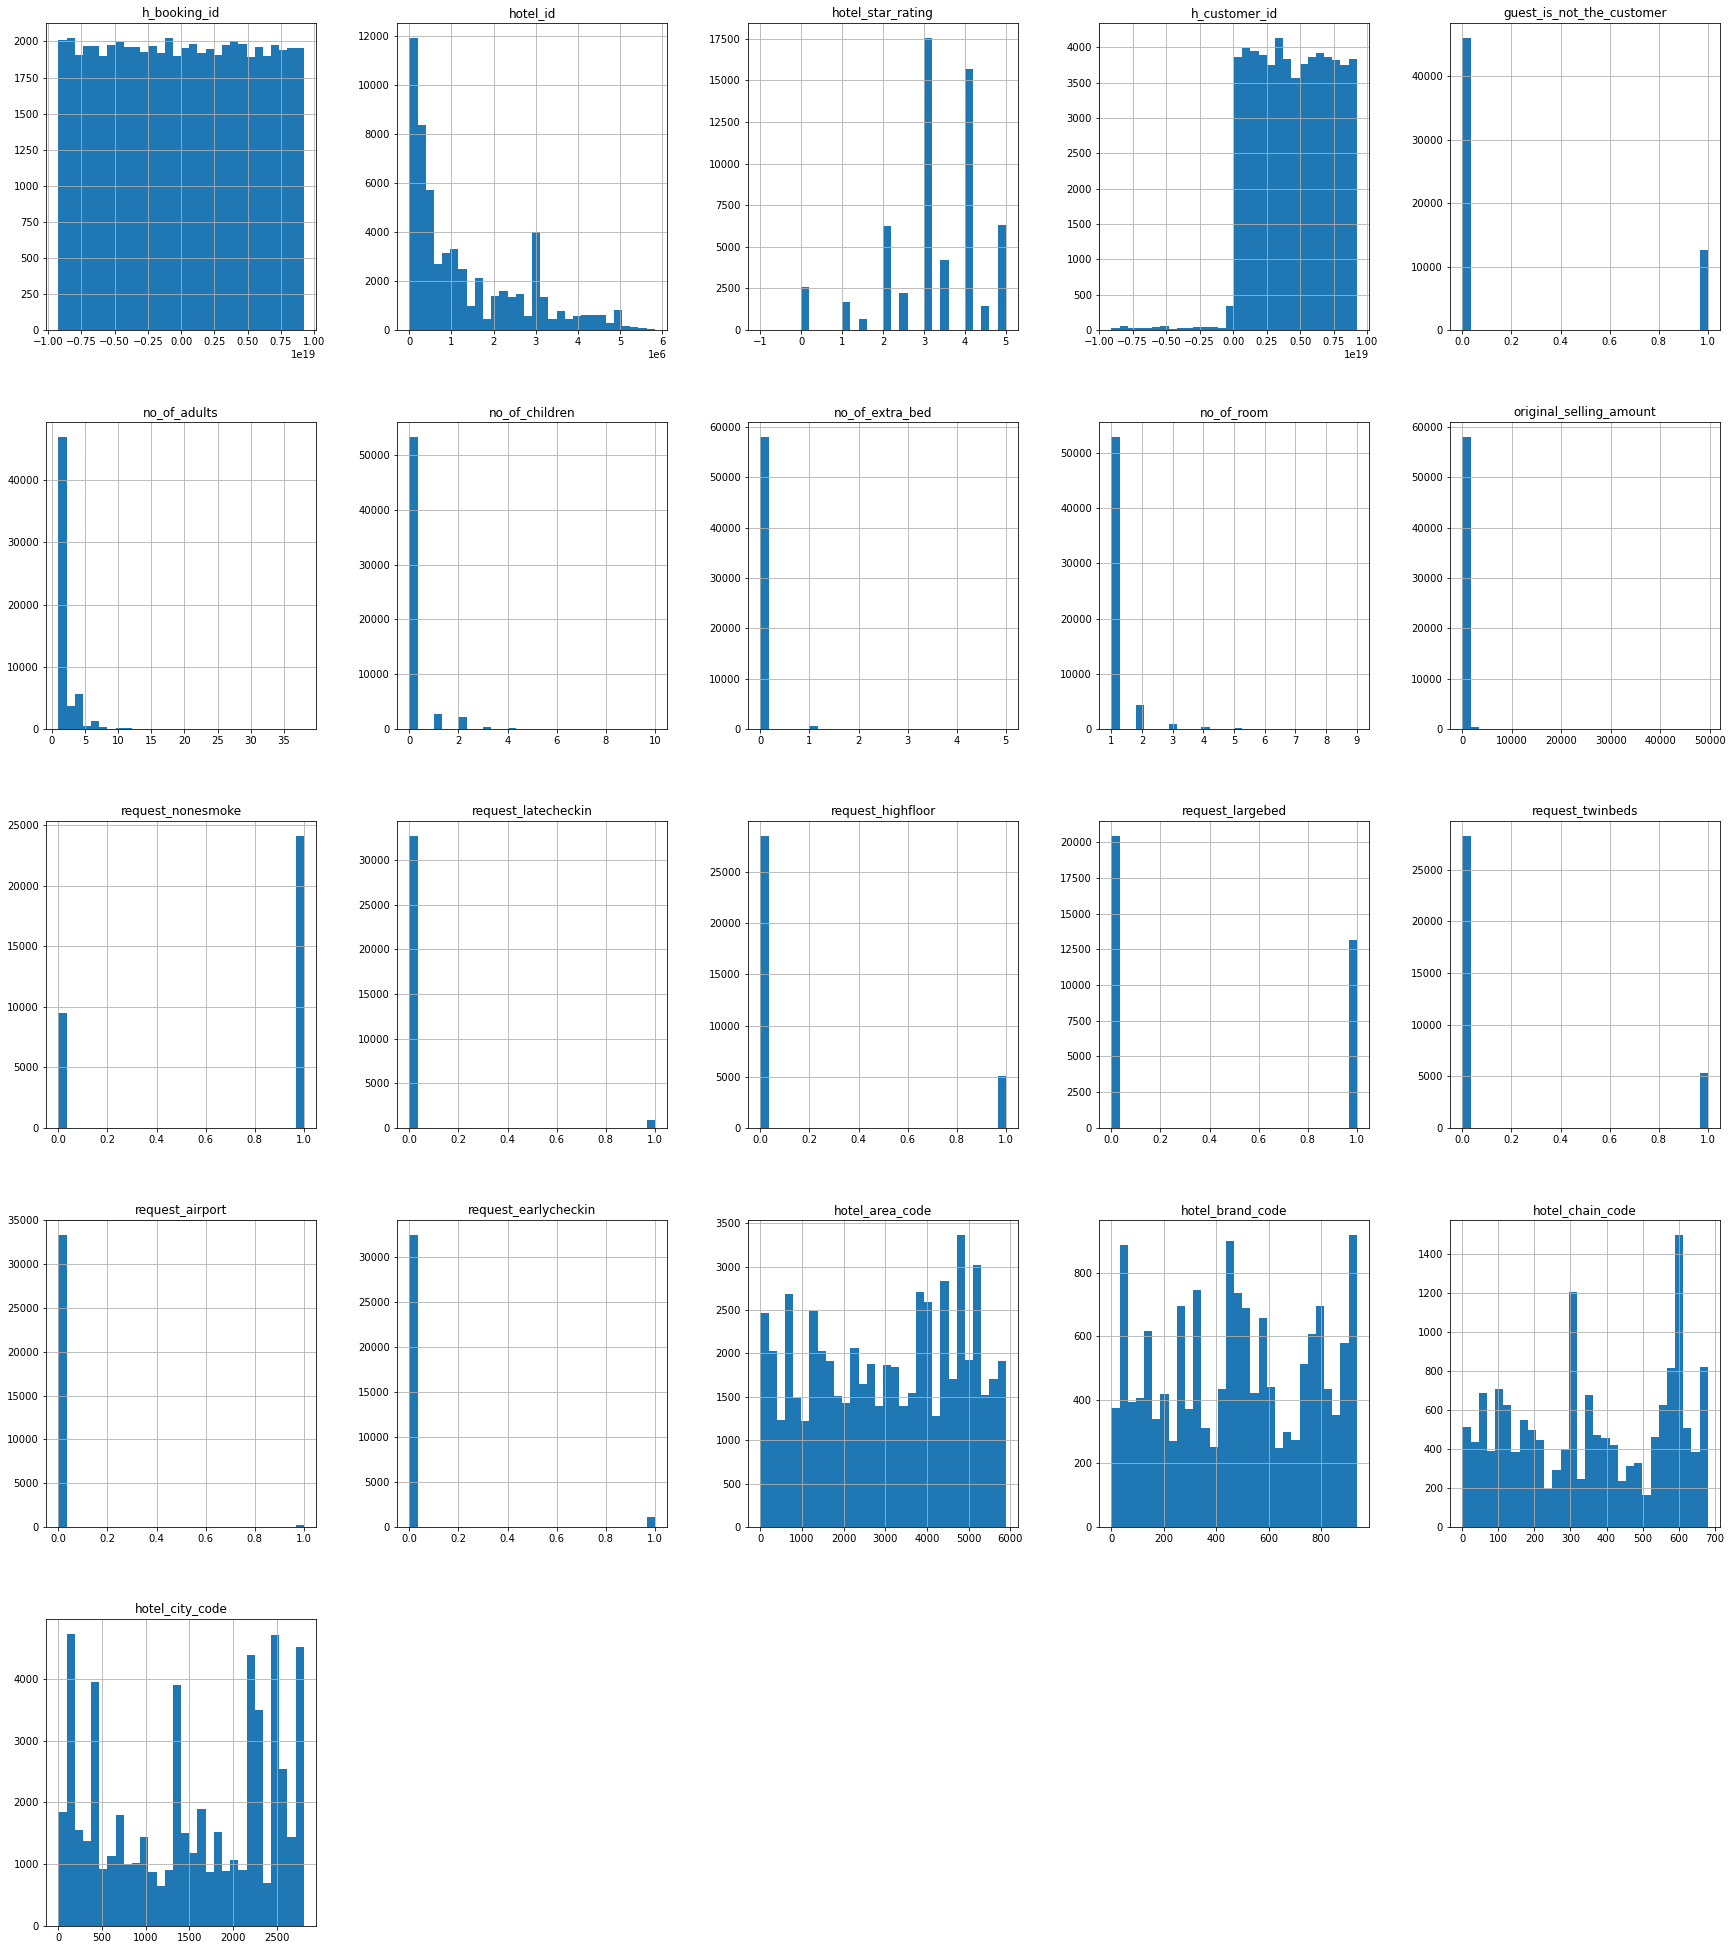

In [4]:
df.hist(bins=30, figsize=(30,35))
plt.show()

In [5]:
#changing the data

In [6]:
df.dtypes

h_booking_id                        int64
booking_datetime                   object
checkin_date                       object
checkout_date                      object
hotel_id                            int64
hotel_country_code                 object
hotel_live_date                    object
hotel_star_rating                 float64
accommadation_type_name            object
charge_option                      object
h_customer_id                       int64
customer_nationality               object
guest_is_not_the_customer           int64
guest_nationality_country_name     object
no_of_adults                        int64
no_of_children                      int64
no_of_extra_bed                     int64
no_of_room                          int64
origin_country_code                object
language                           object
original_selling_amount           float64
original_payment_method            object
original_payment_type              object
original_payment_currency         

In [7]:
df = df.drop(['h_booking_id', 'h_customer_id','hotel_id','hotel_city_code','hotel_live_date'], axis=1)
df['cancellation_datetime'] = df['cancellation_datetime'].fillna(False)
df['cancellation_datetime'].astype('bool')
df

,booking_datetime,checkin_date,checkout_date,hotel_country_code,hotel_star_rating,accommadation_type_name,charge_option,customer_nationality,guest_is_not_the_customer,guest_nationality_country_name,...,request_latecheckin,request_highfloor,request_largebed,request_twinbeds,request_airport,request_earlycheckin,cancellation_datetime,hotel_area_code,hotel_brand_code,hotel_chain_code
0,2018-06-28 21:15:00,2018-07-09 00:00:00,2018-07-13 00:00:00,HK,4.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1192,NaN,NaN
1,2018-08-10 22:31:00,2018-08-16 00:00:00,2018-08-17 00:00:00,CN,4.0,Hotel,Pay Later,South Africa,0,South Africa,...,0.0,0.0,0.0,1.0,0.0,0.0,False,5617,902.0,600.0
2,2018-09-14 07:55:00,2018-09-14 00:00:00,2018-09-15 00:00:00,KR,4.0,Hotel,Pay Now,South Korea,0,South Korea,...,0.0,0.0,0.0,0.0,0.0,0.0,False,3819,NaN,NaN
3,2018-06-25 07:33:00,2018-07-02 00:00:00,2018-07-03 00:00:00,JP,3.0,Hotel,Pay Later,Singapore,0,Singapore,...,0.0,0.0,1.0,0.0,0.0,0.0,False,2379,466.0,236.0
4,2018-07-23 10:06:00,2018-08-09 00:00:00,2018-08-10 00:00:00,TH,3.0,Resort,Pay Later,Thailand,0,Thailand,...,0.0,0.0,1.0,0.0,0.0,0.0,2018-07-23,1506,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58654,2018-07-18 22:07:00,2018-08-04 00:00:00,2018-08-05 00:00:00,ID,2.0,Guest House / Bed & Breakfast,Pay Now,Indonesia,1,Indonesia,...,0.0,0.0,1.0,0.0,0.0,0.0,2018-07-22,995,NaN,NaN
58655,2018-09-05 12:07:00,2018-09-06 00:00:00,2018-09-08 00:00:00,PH,4.0,Apartment,Pay Now,Philippines,0,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,False,674,NaN,NaN
58656,2018-06-08 23:23:00,2018-08-09 00:00:00,2018-08-11 00:00:00,TH,5.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,NaN,False,3823,754.0,55.0
58657,2018-09-02 08:18:00,2018-09-10 00:00:00,2018-09-12 00:00:00,DE,0.0,Hostel,Pay Now,Mexico,0,Mexico,...,0.0,0.0,0.0,1.0,0.0,0.0,False,4663,NaN,NaN


In [8]:
df

,booking_datetime,checkin_date,checkout_date,hotel_country_code,hotel_star_rating,accommadation_type_name,charge_option,customer_nationality,guest_is_not_the_customer,guest_nationality_country_name,...,request_latecheckin,request_highfloor,request_largebed,request_twinbeds,request_airport,request_earlycheckin,cancellation_datetime,hotel_area_code,hotel_brand_code,hotel_chain_code
0,2018-06-28 21:15:00,2018-07-09 00:00:00,2018-07-13 00:00:00,HK,4.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1192,NaN,NaN
1,2018-08-10 22:31:00,2018-08-16 00:00:00,2018-08-17 00:00:00,CN,4.0,Hotel,Pay Later,South Africa,0,South Africa,...,0.0,0.0,0.0,1.0,0.0,0.0,False,5617,902.0,600.0
2,2018-09-14 07:55:00,2018-09-14 00:00:00,2018-09-15 00:00:00,KR,4.0,Hotel,Pay Now,South Korea,0,South Korea,...,0.0,0.0,0.0,0.0,0.0,0.0,False,3819,NaN,NaN
3,2018-06-25 07:33:00,2018-07-02 00:00:00,2018-07-03 00:00:00,JP,3.0,Hotel,Pay Later,Singapore,0,Singapore,...,0.0,0.0,1.0,0.0,0.0,0.0,False,2379,466.0,236.0
4,2018-07-23 10:06:00,2018-08-09 00:00:00,2018-08-10 00:00:00,TH,3.0,Resort,Pay Later,Thailand,0,Thailand,...,0.0,0.0,1.0,0.0,0.0,0.0,2018-07-23,1506,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58654,2018-07-18 22:07:00,2018-08-04 00:00:00,2018-08-05 00:00:00,ID,2.0,Guest House / Bed & Breakfast,Pay Now,Indonesia,1,Indonesia,...,0.0,0.0,1.0,0.0,0.0,0.0,2018-07-22,995,NaN,NaN
58655,2018-09-05 12:07:00,2018-09-06 00:00:00,2018-09-08 00:00:00,PH,4.0,Apartment,Pay Now,Philippines,0,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,False,674,NaN,NaN
58656,2018-06-08 23:23:00,2018-08-09 00:00:00,2018-08-11 00:00:00,TH,5.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,NaN,False,3823,754.0,55.0
58657,2018-09-02 08:18:00,2018-09-10 00:00:00,2018-09-12 00:00:00,DE,0.0,Hostel,Pay Now,Mexico,0,Mexico,...,0.0,0.0,0.0,1.0,0.0,0.0,False,4663,NaN,NaN


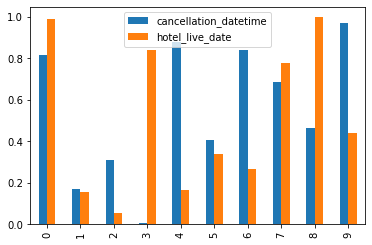

In [9]:
df2 = pd.DataFrame(np.random.rand(10, 2), columns=["cancellation_datetime", "hotel_live_date"])

df2.plot.bar();

In [10]:
df['cancel'] = True
df.loc[df['cancellation_datetime'] == False, 'cancel'] = False
df['cancel']

0        False
1        False
2        False
3        False
4         True
         ...  
58654     True
58655    False
58656    False
58657    False
58658    False
Name: cancel, Length: 58659, dtype: bool

In [11]:
df

,booking_datetime,checkin_date,checkout_date,hotel_country_code,hotel_star_rating,accommadation_type_name,charge_option,customer_nationality,guest_is_not_the_customer,guest_nationality_country_name,...,request_highfloor,request_largebed,request_twinbeds,request_airport,request_earlycheckin,cancellation_datetime,hotel_area_code,hotel_brand_code,hotel_chain_code,cancel
0,2018-06-28 21:15:00,2018-07-09 00:00:00,2018-07-13 00:00:00,HK,4.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,False,1192,NaN,NaN,False
1,2018-08-10 22:31:00,2018-08-16 00:00:00,2018-08-17 00:00:00,CN,4.0,Hotel,Pay Later,South Africa,0,South Africa,...,0.0,0.0,1.0,0.0,0.0,False,5617,902.0,600.0,False
2,2018-09-14 07:55:00,2018-09-14 00:00:00,2018-09-15 00:00:00,KR,4.0,Hotel,Pay Now,South Korea,0,South Korea,...,0.0,0.0,0.0,0.0,0.0,False,3819,NaN,NaN,False
3,2018-06-25 07:33:00,2018-07-02 00:00:00,2018-07-03 00:00:00,JP,3.0,Hotel,Pay Later,Singapore,0,Singapore,...,0.0,1.0,0.0,0.0,0.0,False,2379,466.0,236.0,False
4,2018-07-23 10:06:00,2018-08-09 00:00:00,2018-08-10 00:00:00,TH,3.0,Resort,Pay Later,Thailand,0,Thailand,...,0.0,1.0,0.0,0.0,0.0,2018-07-23,1506,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58654,2018-07-18 22:07:00,2018-08-04 00:00:00,2018-08-05 00:00:00,ID,2.0,Guest House / Bed & Breakfast,Pay Now,Indonesia,1,Indonesia,...,0.0,1.0,0.0,0.0,0.0,2018-07-22,995,NaN,NaN,True
58655,2018-09-05 12:07:00,2018-09-06 00:00:00,2018-09-08 00:00:00,PH,4.0,Apartment,Pay Now,Philippines,0,Philippines,...,0.0,0.0,0.0,0.0,0.0,False,674,NaN,NaN,False
58656,2018-06-08 23:23:00,2018-08-09 00:00:00,2018-08-11 00:00:00,TH,5.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,False,3823,754.0,55.0,False
58657,2018-09-02 08:18:00,2018-09-10 00:00:00,2018-09-12 00:00:00,DE,0.0,Hostel,Pay Now,Mexico,0,Mexico,...,0.0,0.0,1.0,0.0,0.0,False,4663,NaN,NaN,False


In [12]:
df['cancel'] = df['cancel'].astype('int')
df['accommadation_type_name'] = df['accommadation_type_name'].astype("category")

In [13]:
df.dtypes

booking_datetime                    object
checkin_date                        object
checkout_date                       object
hotel_country_code                  object
hotel_star_rating                  float64
accommadation_type_name           category
charge_option                       object
customer_nationality                object
guest_is_not_the_customer            int64
guest_nationality_country_name      object
no_of_adults                         int64
no_of_children                       int64
no_of_extra_bed                      int64
no_of_room                           int64
origin_country_code                 object
language                            object
original_selling_amount            float64
original_payment_method             object
original_payment_type               object
original_payment_currency           object
is_user_logged_in                     bool
cancellation_policy_code            object
is_first_booking                      bool
request_non

In [14]:
df

,booking_datetime,checkin_date,checkout_date,hotel_country_code,hotel_star_rating,accommadation_type_name,charge_option,customer_nationality,guest_is_not_the_customer,guest_nationality_country_name,...,request_highfloor,request_largebed,request_twinbeds,request_airport,request_earlycheckin,cancellation_datetime,hotel_area_code,hotel_brand_code,hotel_chain_code,cancel
0,2018-06-28 21:15:00,2018-07-09 00:00:00,2018-07-13 00:00:00,HK,4.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,False,1192,NaN,NaN,0
1,2018-08-10 22:31:00,2018-08-16 00:00:00,2018-08-17 00:00:00,CN,4.0,Hotel,Pay Later,South Africa,0,South Africa,...,0.0,0.0,1.0,0.0,0.0,False,5617,902.0,600.0,0
2,2018-09-14 07:55:00,2018-09-14 00:00:00,2018-09-15 00:00:00,KR,4.0,Hotel,Pay Now,South Korea,0,South Korea,...,0.0,0.0,0.0,0.0,0.0,False,3819,NaN,NaN,0
3,2018-06-25 07:33:00,2018-07-02 00:00:00,2018-07-03 00:00:00,JP,3.0,Hotel,Pay Later,Singapore,0,Singapore,...,0.0,1.0,0.0,0.0,0.0,False,2379,466.0,236.0,0
4,2018-07-23 10:06:00,2018-08-09 00:00:00,2018-08-10 00:00:00,TH,3.0,Resort,Pay Later,Thailand,0,Thailand,...,0.0,1.0,0.0,0.0,0.0,2018-07-23,1506,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58654,2018-07-18 22:07:00,2018-08-04 00:00:00,2018-08-05 00:00:00,ID,2.0,Guest House / Bed & Breakfast,Pay Now,Indonesia,1,Indonesia,...,0.0,1.0,0.0,0.0,0.0,2018-07-22,995,NaN,NaN,1
58655,2018-09-05 12:07:00,2018-09-06 00:00:00,2018-09-08 00:00:00,PH,4.0,Apartment,Pay Now,Philippines,0,Philippines,...,0.0,0.0,0.0,0.0,0.0,False,674,NaN,NaN,0
58656,2018-06-08 23:23:00,2018-08-09 00:00:00,2018-08-11 00:00:00,TH,5.0,Hotel,Pay Now,China,0,China,...,NaN,NaN,NaN,NaN,NaN,False,3823,754.0,55.0,0
58657,2018-09-02 08:18:00,2018-09-10 00:00:00,2018-09-12 00:00:00,DE,0.0,Hostel,Pay Now,Mexico,0,Mexico,...,0.0,0.0,1.0,0.0,0.0,False,4663,NaN,NaN,0


In [ ]:
df = pd.DataFrame(df,columns=['cancel','hotel_live_date'])
df.plot(x ='cancel', y='accommadation_type_name', kind = 'line')
plt.show()

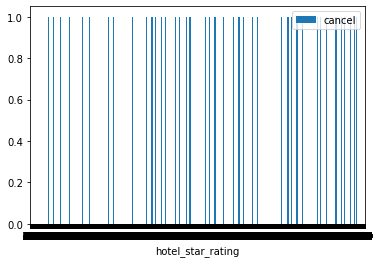

In [15]:
df.plot.bar(x='hotel_star_rating', y='cancel',rot = 0);